In [111]:
%load_ext autoreload
%autoreload 2

import pickle
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../../')
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica as sl


# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
df = pd.read_csv('../../Datos/Datos_Modelo_2/Modelo_2_CL_0.csv', index_col=0) # importo mi modelo más importante
df.head()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category,Quantity_Group
0,5175.171,36.402569,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,389.355572,376.016944,387.974849,557.550307,590.015969,315.266849,601.339346
1,2892.510,36.188641,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,328.616717,294.551347,331.837571,560.247600,617.748325,317.957078,217.412934
2,2862.675,35.674493,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,398.159796,383.684761,384.386158,550.723353,604.896927,316.184040,217.338230
3,1822.080,35.570941,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,306.486498,385.295329,394.028902,472.155097,495.166822,312.282376,214.655783
4,5083.960,34.484046,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,296.790800,255.967758,296.790800,138.996303,92.956661,317.957078,217.412934


In [113]:
df.describe()

,Sales,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country,Region,Market,Category,Sub-Category,Discount_Category,Quantity_Group
count,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000,20567.000000
mean,290.949976,0.882865,0.150435,0.053338,0.195313,0.600914,0.529586,0.302329,0.168085,0.078961,0.298731,0.051782,0.570526,290.716811,290.856904,290.895516,290.915204,290.434085,291.010671,290.660310
std,611.266038,2.667503,0.357506,0.224712,0.396451,0.489722,0.499136,0.459278,0.373951,0.269685,0.457713,0.221592,0.495013,95.723287,68.880546,71.908386,186.669401,267.178435,59.457224,161.815981
min,0.444000,-0.341963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.335223,181.484663,181.484663,137.541249,26.375065,45.352259,214.655783
25%,32.400000,-0.229781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,247.136667,260.132758,221.986720,138.910688,76.640177,312.282376,217.338230
50%,93.723600,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,296.790800,288.763633,300.569940,141.168329,125.956753,315.266849,219.612001
75%,283.860000,0.770219,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,345.361881,312.428404,331.837571,480.646696,509.812369,317.957078,220.178440
max,22638.480000,36.402569,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1619.100000,479.424068,394.028902,560.247600,1048.379970,318.259491,1019.446060


In [114]:
x= df.drop(columns='Sales')
y = df[['Sales']]

In [115]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [117]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [118]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[447.60407226],
       [695.97970889],
       [ -8.43556881]])

In [119]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[251.50559132],
       [399.99625236],
       [841.14814315]])

In [120]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [121]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.571510,144.960322,170255.144893,412.619855
test,0.702294,138.871313,94746.249576,307.808787


Text(0, 0.5, 'Predicciones (y_test_pred)')

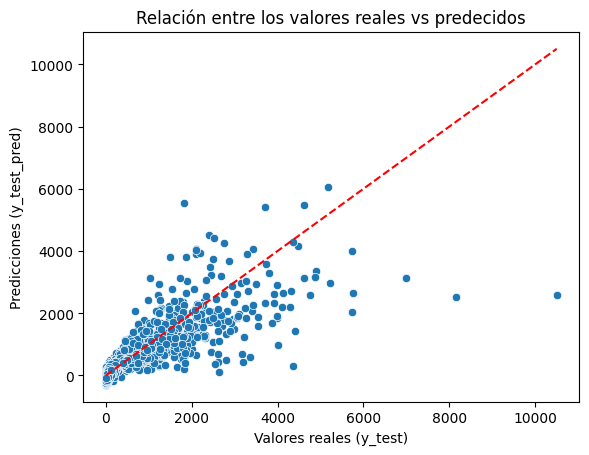

In [122]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

Se puede observar que aun hay underfitting, a pesar de que en comparación con el modelo 1 no se habían incluido las variables demográficas que se eligieron para este.

## Decision Tree

In [123]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [124]:
params_arbol_2 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [40,50,60],
    'min_samples_leaf': [18, 20,21],
    'max_leaf_nodes': [25,28,30,32,35]
}

In [125]:
params_arbol_3 = {
    'max_depth': [6, 7,8,9],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [126]:
params_arbol_4 = {
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [15, 50, 100],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [32,35,40,42]
}

In [127]:
params_arbol_5 = {
    'max_depth': [7,10,14],
    'min_samples_split': [50,55],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [30,38,40,42]
}

In [128]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 14],
                         'max_leaf_nodes': [30, 38, 40, 42],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [50, 55]},
             scoring='neg_mean_squared_error')

In [129]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [130]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=42, min_samples_leaf=20,
                      min_samples_split=50)

In [131]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [132]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [133]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.664813,104.920164,133182.337236,364.941553
test,0.789043,103.892041,67138.094232,259.110197


Nuevamente se puede observar underfitting, además de una disparidad bastante clara en el RMSE.

In [106]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
313,0.389352,0.265618,0.031351,0.019657,14,30,20,50,"{'max_depth': 14, 'max_leaf_nodes': 30, 'min_s...",-117802.866975,-105748.544763,-74342.285897,-402019.667493,-69195.947070,-153821.862440,125450.477065,1
153,0.160238,0.086030,0.014029,0.007558,7,30,20,50,"{'max_depth': 7, 'max_leaf_nodes': 30, 'min_sa...",-117802.866975,-105748.544763,-74342.285897,-402019.667493,-69195.947070,-153821.862440,125450.477065,2
233,0.237490,0.088341,0.022876,0.014302,10,30,20,50,"{'max_depth': 10, 'max_leaf_nodes': 30, 'min_s...",-117802.866975,-105748.544763,-74363.443119,-402019.667493,-69195.947070,-153826.093884,125447.796476,3
149,0.153147,0.114166,0.012577,0.008470,7,30,15,50,"{'max_depth': 7, 'max_leaf_nodes': 30, 'min_sa...",-120088.425066,-106229.948196,-74421.518694,-403333.496719,-68499.609696,-154514.599674,125889.548982,4
309,0.235649,0.193704,0.030208,0.030863,14,30,15,50,"{'max_depth': 14, 'max_leaf_nodes': 30, 'min_s...",-120088.425066,-106229.948196,-74430.340581,-403333.496719,-68499.609696,-154516.364052,125888.426500,5
229,0.270199,0.008386,0.027215,0.004499,10,30,15,50,"{'max_depth': 10, 'max_leaf_nodes': 30, 'min_s...",-120088.425066,-106229.948196,-74430.340581,-403333.496719,-68499.609696,-154516.364052,125888.426500,6
232,0.165989,0.113261,0.015778,0.012372,10,30,20,10,"{'max_depth': 10, 'max_leaf_nodes': 30, 'min_s...",-117802.866975,-108944.841445,-74723.578551,-408641.812021,-65901.943395,-155203.008477,128235.279552,7
312,0.332659,0.220946,0.053672,0.038799,14,30,20,10,"{'max_depth': 14, 'max_leaf_nodes': 30, 'min_s...",-117802.866975,-108944.841445,-74723.578551,-408641.812021,-65901.943395,-155203.008477,128235.279552,7
152,0.184121,0.064390,0.019913,0.008269,7,30,20,10,"{'max_depth': 7, 'max_leaf_nodes': 30, 'min_sa...",-117802.866975,-108944.841445,-74744.735773,-408641.812021,-65901.943395,-155207.239922,128232.624184,9
157,0.264272,0.014238,0.031687,0.003547,7,30,30,50,"{'max_depth': 7, 'max_leaf_nodes': 30, 'min_sa...",-128797.801886,-106715.730173,-72656.272893,-397265.022761,-71225.858109,-155332.137164,122888.821152,10


In [107]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
313,14,30,20,50,-153821.862440
153,7,30,20,50,-153821.862440
233,10,30,20,50,-153826.093884
149,7,30,15,50,-154514.599674
309,14,30,15,50,-154516.364052
...,...,...,...,...,...
246,14,6,15,100,-186994.881625
90,7,6,20,100,-186994.881625
173,10,6,30,50,-186994.881625
6,4,6,15,100,-186994.881625


In [108]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [109]:
df_rmse_prof

,param_max_depth,MSE
0,4,417.333145
1,7,414.309044
2,10,414.309611
3,14,414.309431


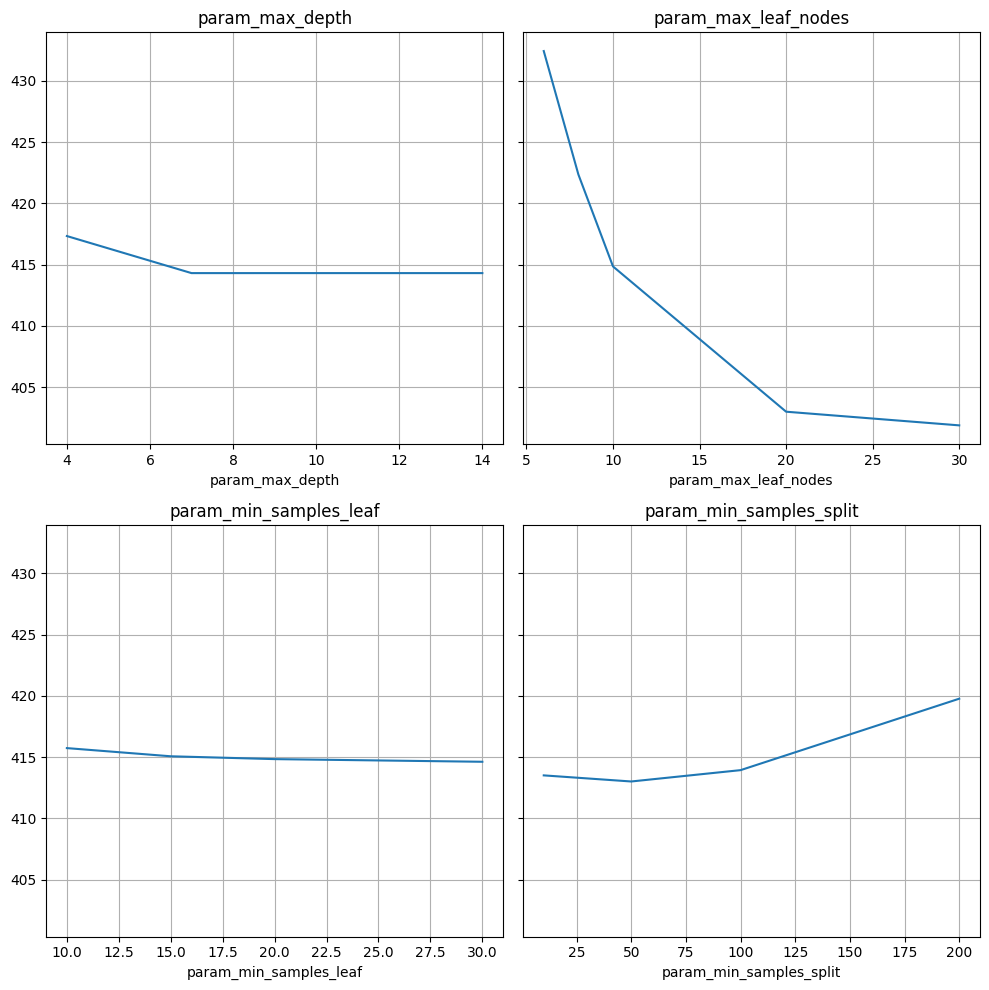

In [110]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [81]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

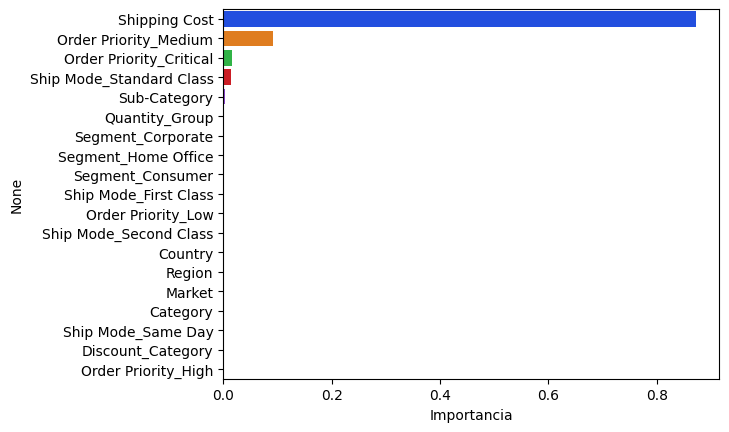

In [82]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

## Random Forest

In [134]:
params_rrf = {
    'n_estimators': [100, 250, 300],
    'max_features': [4,8,10],
    'max_depth': [10],
    'min_samples_split': [50,55],
    'min_samples_leaf': [15,18,20], 
    'max_leaf_nodes': [42,45,50,55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [135]:
modelo_final_rrf

RandomForestRegressor(max_depth=10, max_features=10, max_leaf_nodes=45,
                      min_samples_leaf=15, min_samples_split=55,
                      n_estimators=250, n_jobs=-1, random_state=42)

In [136]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.673187,99.930297,129855.340360,360.354465
test,0.813128,97.696893,59472.795873,243.870449


Se puede apreciar nuevamente underfitting.

### Random Distinto

In [137]:
params_rf = {
    'n_estimators': [225,250,300],
    'max_features': [5,7,9,10],
    'max_depth': [1,2,3,5,7,9,10],
    'min_samples_split': [42,45,28,50,55],
    'min_samples_leaf': [15,19,20], 
    'max_leaf_nodes': [45,50]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [138]:
modelo_final_rf

RandomForestRegressor(max_depth=7, max_features=10, max_leaf_nodes=50,
                      min_samples_leaf=15, min_samples_split=28,
                      n_estimators=300, random_state=42)

In [139]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.682138,97.967691,126298.679472,355.385255
test,0.819732,96.023350,57371.059793,239.522566


## Gradient Booster

In [140]:
params_gb = {
    'n_estimators': [200,250,300],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,7,9],
    'min_samples_split': [55,65,45],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [141]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=20, min_samples_split=45,
                          n_estimators=200, random_state=42)

In [142]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.724556,90.752574,109444.133246,330.823417
test,0.832719,90.919833,53237.841807,230.733270


Pudieramos decir que este es el mejor modelo, sin embargo hay que considerar que todos tienen underfitting.  Por lo que, aunque este también tiene, podemos seleccionar este por sus métricas

## XGB

In [143]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['Sales'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [144]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [145]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.641053,115.698482,142623.157155,377.654812
test,0.779426,111.856380,70198.537854,264.950067
